# Heart Diseases Dataset Processing

This notebook goal is to:
* Reduce dimensionality
* Deal with the imbalance in the dataset
* Feature Engineering
* Any other necessary transformation
* last: train-test split. Always in mind to save the transformations map.


## TODO 

* [ ] Change race_x to bool 
* [X] Outliers BMI
* [X] Deal with the imbalance in the dataset
    * Look at parameters of SMOTE and TomekLinks
* [X] Feature Engineering
    * Scaling
* [ ] Reduce dimensionality
* [X] train-test split

Always in mind: 
Save transformation pickles (e.g. sklearn standardization object)

## Import libraries & data

In this section, we load the required libraries, the data, and also verify if the data was loaded correctly.

In [1]:
import os
from datetime import datetime
import logging
_NOTEBOOK_START = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
if not os.path.exists('logs'):
  # Create a new directory because it does not exist 
  os.makedirs('logs')
logging.basicConfig(filename=f'logs/heart_processing_{_NOTEBOOK_START}.log', encoding='utf-8', level=logging.DEBUG, format='%(levelname)s:%(asctime)s:%(message)s')

In [2]:
_TREAT_DATA_FOR_IMBALANCE = False
_LOAD_IMBALANCED_DATA = True if not _TREAT_DATA_FOR_IMBALANCE else False
_USE_IMBALANCE_DATASET = True

In [3]:
_ABSOLUTE_DIR = os.getcwd()
import typing
import pickle

import numpy as np
import pandas as pd

## SKLEARN LIBRARIES
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Imbalance
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

logging.info(f'Imports loaded')

In [4]:
dfHeart_preprocessed = pd.read_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_preprocessed.parquet')
logging.info(f'Load dataset from {_ABSOLUTE_DIR}/../artifacts/data/heart/heart_preprocessed.parquet')

In [5]:
## Confirm dataset is loaded
dfHeart_preprocessed

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,age_40-44_fe,age_45-49_fe,age_50-54_fe,age_55-59_fe,age_60-64_fe,age_65-69_fe,age_70-74_fe,age_75-79_fe,age_80orolder_fe,AgeCategory_seq_fe
0,False,16.60,True,False,False,3,30,False,1,True,...,0,0,0,1,0,0,0,0,0,8
1,False,20.34,False,False,True,0,0,False,1,True,...,0,0,0,0,0,0,0,0,1,13
2,False,26.58,True,False,False,20,30,False,0,True,...,0,0,0,0,0,1,0,0,0,10
3,False,24.21,False,False,False,0,0,False,1,False,...,0,0,0,0,0,0,0,1,0,12
4,False,23.71,False,False,False,28,0,True,1,True,...,1,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,True,27.41,True,False,False,7,0,True,0,False,...,0,0,0,0,1,0,0,0,0,9
319791,False,29.84,True,False,False,0,0,False,0,True,...,0,0,0,0,0,0,0,0,0,4
319792,False,24.24,False,False,False,0,0,False,1,True,...,0,1,0,0,0,0,0,0,0,6
319793,False,32.81,False,False,False,0,0,False,1,False,...,0,0,0,0,0,0,0,0,0,2


In [6]:
## Confirm dtypes
dfHeart_preprocessed.dtypes

HeartDisease                               bool
BMI                                     float64
Smoking                                    bool
AlcoholDrinking                            bool
Stroke                                     bool
PhysicalHealth                            int32
MentalHealth                              int32
DiffWalking                                bool
Sex                                       int64
PhysicalActivity                           bool
GenHealth                                 int64
SleepTime                                 int32
Asthma                                     bool
KidneyDisease                              bool
SkinCancer                                 bool
race_americanindian/alaskannative_fe      uint8
race_asian_fe                             uint8
race_black_fe                             uint8
race_hispanic_fe                          uint8
race_other_fe                             uint8
race_white_fe                           

V1: race_x is coming as uint8, which probably isn't the best way to have this column as.  
V2: 

In [7]:
if _TREAT_DATA_FOR_IMBALANCE:
    x_data = dfHeart_preprocessed[[column for column in dfHeart_preprocessed.columns if column != 'HeartDisease']]
    y_data = dfHeart_preprocessed['HeartDisease']

## Imbalanced data 

In this section, we treat the imbalance on the data. We use SMOTE and TomekLinks.  


We were guided by these tutorials:   
https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be  
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification  

We were having difficulties in using this method with the whole dataset. 


In [8]:
if _TREAT_DATA_FOR_IMBALANCE:
    ## Create SMOTE Class Object
    hrtSmote = SMOTE(sampling_strategy = 'minority', n_jobs=-1)
    
    ## Create TomekLinks Class Object
    hrtTomek = TomekLinks(sampling_strategy = 'majority', n_jobs=-1)
    
    X, y = hrtCombineSampling.fit_resample(x_data, y_data)
    # The result is a dataset with 582.701 observations
    # Takes about 3 hours and half to run.
    
    # Observation ID 317695 is the last real observation.
    # Known by the fact it's the last two decimal digits BMI observation.

In [9]:
if _TREAT_DATA_FOR_IMBALANCE:
    logging.info(f'Saving SMOTETOMEK Dataset')
    X['HeartDisease'] = y
    heartDisease_imbalance = X
    heartDisease_imbalance['FLAG_REAL'] = 0
    heartDisease_imbalance.loc[0:317695, 'FLAG_REAL'] = 1
    heartDisease_imbalance.to_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_smotetomek_1505222.parquet')
    
if _LOAD_IMBALANCED_DATA:
    heartDisease_imbalance = pd.read_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_smotetomek_1505222.parquet')

### Analysis

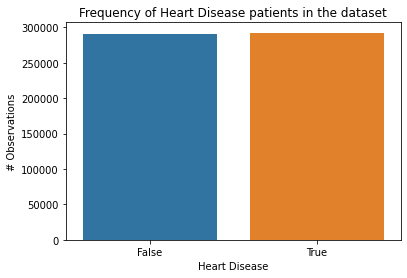

In [16]:
if _USE_IMBALANCE_DATASET:
    ax = sns.countplot(x = heartDisease_imbalance['HeartDisease'])
    ax.set(xlabel='Heart Disease', ylabel='# Observations', title = "Frequency of Heart Disease patients in the dataset")
    fig = ax.get_figure()
    fig.savefig(f'heart_imbalance_targetCount.png')

As he can see, the target feature was balanced. But lets look at the other features, like we did in preprocessing, just as a sanity check.


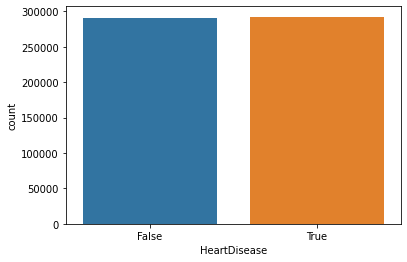

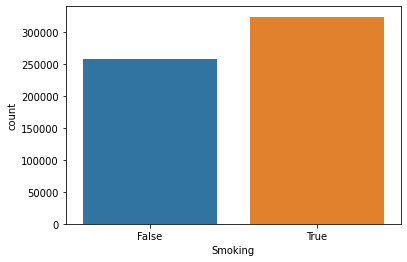

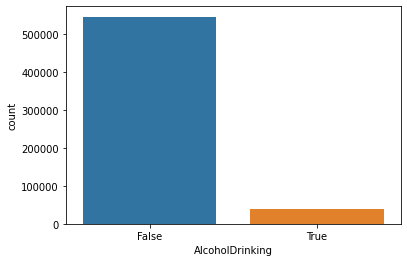

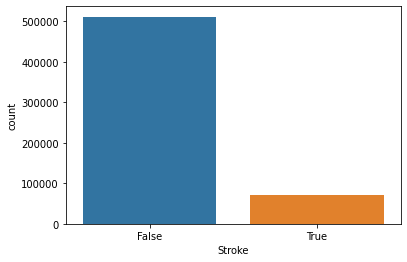

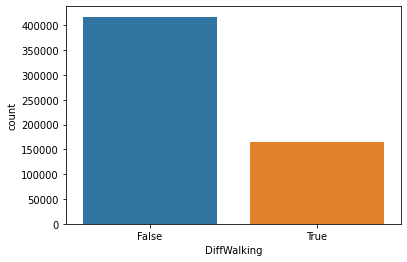

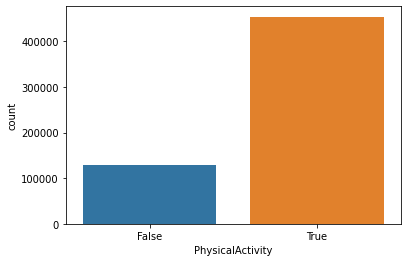

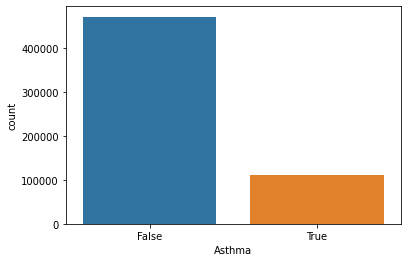

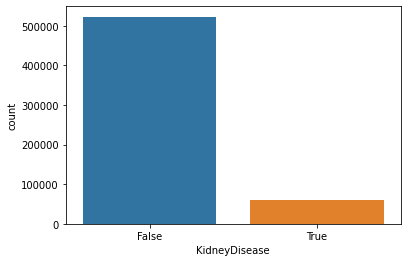

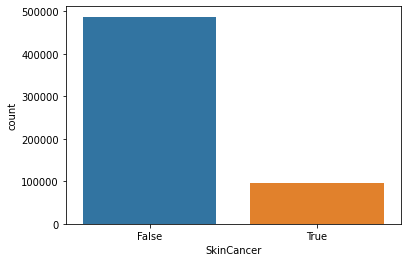

In [11]:
_STRING_TO_BOOL_FEATURES = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'] 
if _USE_IMBALANCE_DATASET:
    for i in _STRING_TO_BOOL_FEATURES:
        sns.countplot(x = heartDisease_imbalance[i])
        plt.show()

In [12]:
if _USE_IMBALANCE_DATASET:
    for i in _STRING_TO_BOOL_FEATURES:
        true_false_rate = round(heartDisease_imbalance[i].sum()/heartDisease_imbalance[i].count(),3)
        print(true_false_rate)

0.502
0.557
0.065
0.123
0.284
0.779
0.19
0.103
0.164


| Feature          | Original | Imbalanced Fixed | Difference (%) |
|------------------|----------|------------------|----------------|
| HeartDisease     | 0.086    | 0.502            | 41.6%          |
| Smoking          | 0.412    | 0.557            | 14.5%          |
| AlcoholDrinking  | 0.068    | 0.065            | -0.3%          |
| Stroke           | 0.038    | 0.123            | 8.5%           |
| DiffWalking      | 0.139    | 0.284            | 14.5%          |
| PhysicalActivity | 0.775    | 0.779            | 0.4%           |
| Asthma           | 0.134    | 0.19             | 5.6%           |
| KidneyDisease    | 0.037    | 0.103            | 6.6%           |
| SkinCancer       | 0.093    | 0.164            | 7.1%           |

We can see that the features that changed the most from one dataset to the other were the huge increase in the samples of `Smoking`, and `DiffWalking`.  
But overall every feature increased the sample size in the `True` label, except `AlcoholDrinking`, which actually decreased slightly, and `PhysicalActivity`, which increased slightly too.  

If we check the Synthetic data subset, we might expect that the features with most differences from the original to imbalance fixed are the ones who lean more towards the `True` label.

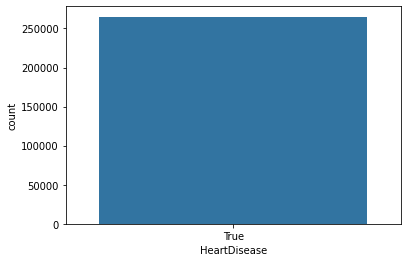

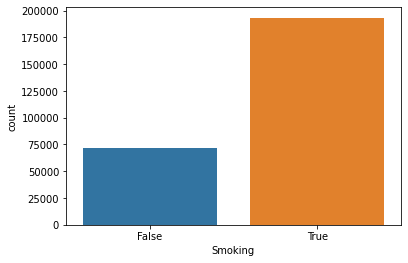

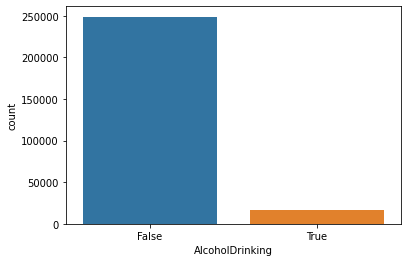

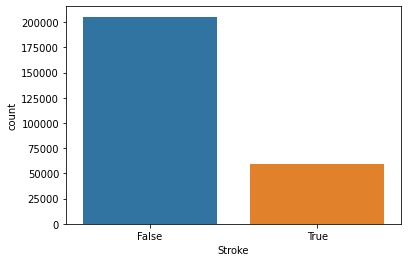

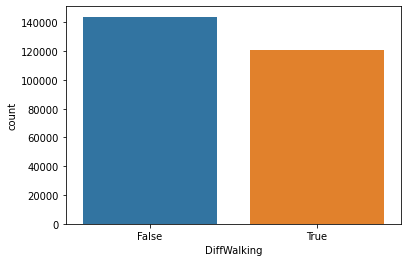

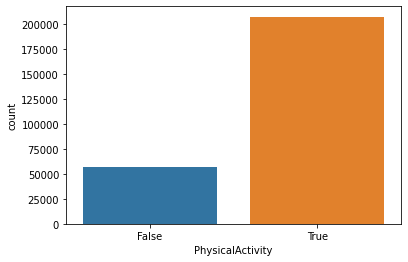

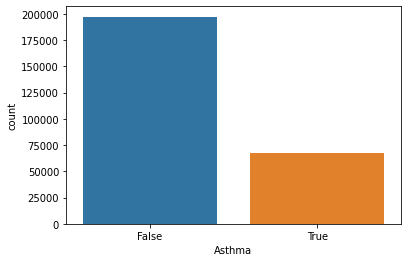

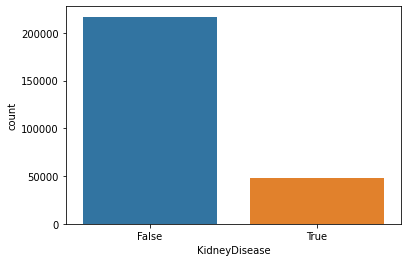

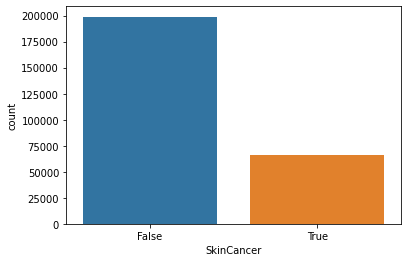

In [13]:
if _USE_IMBALANCE_DATASET:
    for i in _STRING_TO_BOOL_FEATURES:
        sns.countplot(x = heartDisease_imbalance[(heartDisease_imbalance['FLAG_REAL'] == 0)][i])
        plt.show()

In [14]:
if _USE_IMBALANCE_DATASET:
    heartDisease_imbalance

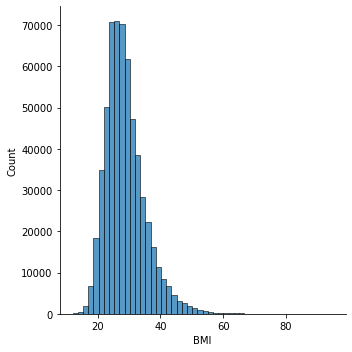

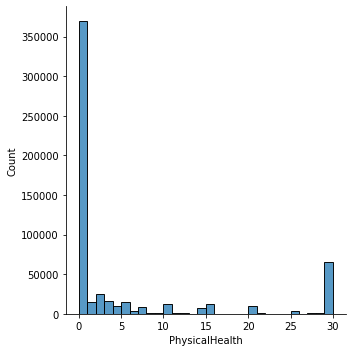

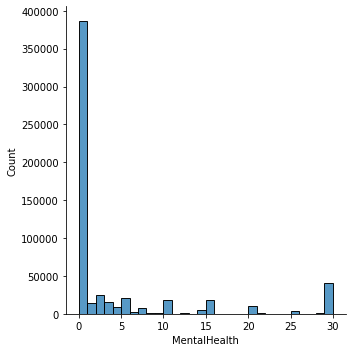

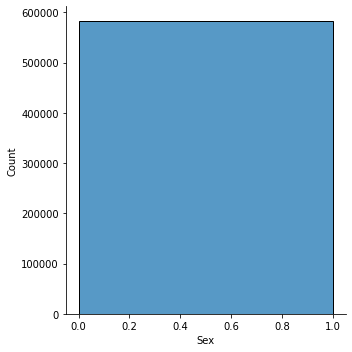

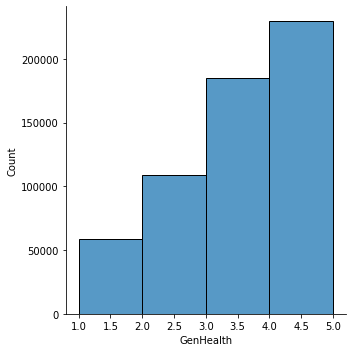

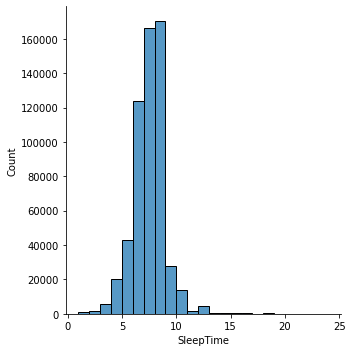

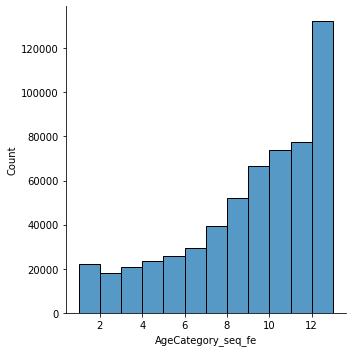

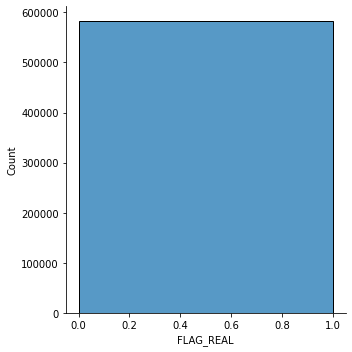

In [15]:
if _USE_IMBALANCE_DATASET:
    _CONTINUOUS_FEATURES = heartDisease_imbalance.select_dtypes(include=['float64', 'int32', 'int64']).columns
    for i in _CONTINUOUS_FEATURES:
        unique_values = heartDisease_imbalance[i].unique()
        sns.displot(x = heartDisease_imbalance[i], bins = 50 if i == 'BMI' else max(unique_values) - min(unique_values))
        plt.show()

In [16]:
if _USE_IMBALANCE_DATASET:
    heartDisease_imbalance.dtypes

In [17]:
if _USE_IMBALANCE_DATASET:
    heart_race_df = heartDisease_imbalance.filter(regex='^race_',axis=1).idxmax(axis=1)
    heart_age_df = heartDisease_imbalance.filter(regex='^age_',axis=1).idxmax(axis=1)
    heart_diabetic_df = heartDisease_imbalance.filter(regex='^diabetic_',axis=1).idxmax(axis=1)

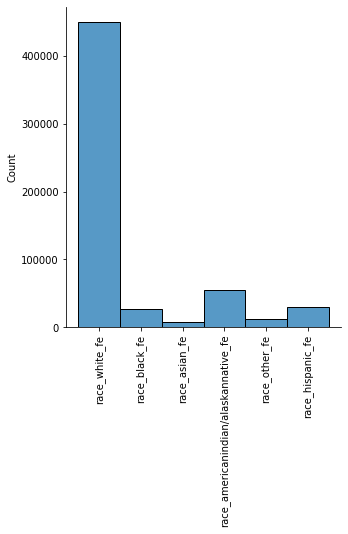

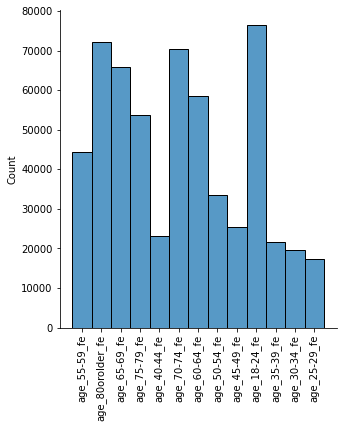

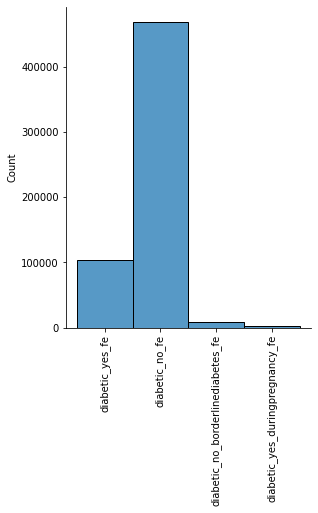

In [18]:
if _USE_IMBALANCE_DATASET:
    for i in [heart_race_df, heart_age_df, heart_diabetic_df]:
        sns.displot(x = i)
        plt.xticks(rotation = 90)
        plt.show()

If this was a true model to implement into the real world, we would have to work on the `race` feature, because other races are being overshadowed by the `white` category. This is suboptimal when we are trying to help people. No intention to have prejudice, but diverging to fix this issue is not in the scope of this project.

In [19]:
if _USE_IMBALANCE_DATASET:
    dfHeart_preprocessed = heartDisease_imbalance

## Outliers

Since the only feature truly prone to outliers is the `BMI`, lets look at it.

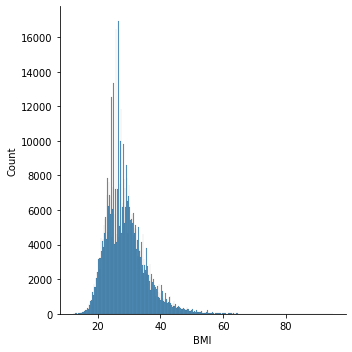

In [20]:
sns.displot(x = dfHeart_preprocessed['BMI'])

Let us apply the interquantile range method to see the value of the 99th percentile.

In [21]:
BMI_99 = np.percentile(dfHeart_preprocessed['BMI'], 99)

In [22]:
dfHeart_filter_2 = dfHeart_preprocessed[(dfHeart_preprocessed['BMI'] >= BMI_99)]

In [23]:
print(dfHeart_filter_2.shape[0])
print(BMI_99)

5828
49.3418518434795


https://www.cdc.gov/nhsn/pdfs/commup/email-update-nov17.pdf  
I think for pratical purposes, I'll use these guidelines, which cut every value below 12, and above 60.

In [24]:
logging.info(f'COPY DATASET TO IMAGE')
dfHeart_preprocessed_backup = dfHeart_preprocessed.copy()

In [25]:
logging.info(f'REMOVE INCONSIDERATE BMI VALUES FROM DATASET')
dfHeart_preprocessed = dfHeart_preprocessed[(dfHeart_preprocessed['BMI'] >= 12) & (dfHeart_preprocessed['BMI'] <= 60)]

In [26]:
print(f'About {round(dfHeart_preprocessed.shape[0]/dfHeart_preprocessed_backup.shape[0],3)}% of the data was removed, which is good enough.')

About 0.998% of the data was removed, which is good enough.


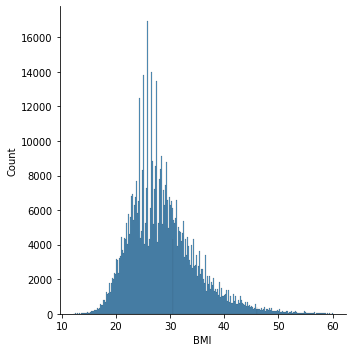

In [27]:
sns.displot(x = dfHeart_preprocessed['BMI'])

## Feature Engineering

Some of the feature engineering possible was already done, namely

* Race to One Hot Encoding
* Diabetic to One Hot Encoding
* Age Category to One Hot Encoding and to Sequential Features
* Gen Health to Sequence
* Sex to 0 and 1

Other possible feature engineering solutions would be:

* Group Smoking, Alcohol Drinking and Physical Activity into a "Bad Habits" feature.
* Group Stroke, Skin Cancer, Asthma and KidneyDisease into a "Prior Diseases" feature
* Bin features PhysicalHealth and MentalHealth to "No Days | 1 Week | 2 Weeks | 3 Weeks | 4 Weeks"
* Scaling of BMI

First we split the dataset into train/test. 

In [28]:
logging.info(f'ADD TRAIN/TEST/VALIDATION FEATURE TO Dataset')
np.random.seed(999)
if "Set" not in dfHeart_preprocessed.columns:
    dfHeart_preprocessed["Set"] = np.random.choice(["train", "valid", "test"], p =[.7, .1, .2], size=(dfHeart_preprocessed.shape[0],))

/tmp/ipykernel_20497/1184306472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHeart_preprocessed["Set"] = np.random.choice(["train", "valid", "test"], p =[.7, .1, .2], size=(dfHeart_preprocessed.shape[0],))


### Scaling BMI

In [29]:
logging.info(f'STANDARD SCALE BMI FEATURE')
bmi_scaler = StandardScaler()
bmi_scaler_fit = bmi_scaler.fit(dfHeart_preprocessed[(dfHeart_preprocessed['Set'] == 'train')]['BMI'].values.reshape(-1, 1))

logging.info(f'SAVE STANDARD SCALE MAPPER')
with open(f'{_ABSOLUTE_DIR}/../artifacts/transformation_maps/heart/bmi_scaler.pickle',"wb") as f:
        pickle.dump(bmi_scaler_fit, f)

In [30]:
dfHeart_preprocessed['BMI_scaled'] = bmi_scaler_fit.transform(dfHeart_preprocessed['BMI'].values.reshape(-1, 1))

/tmp/ipykernel_20497/2796979027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHeart_preprocessed['BMI_scaled'] = bmi_scaler_fit.transform(dfHeart_preprocessed['BMI'].values.reshape(-1, 1))


### Bin features Physical and Mental Health into weeks

In [31]:
logging.info(f'PHYSICAL HEALTH TO WEEKS')
# Physical Health
conds_phw = [
    dfHeart_preprocessed['PhysicalHealth'] == 0, 
    (dfHeart_preprocessed['PhysicalHealth'] > 0) & (dfHeart_preprocessed['PhysicalHealth'] <= 8), # 1 week
    (dfHeart_preprocessed['PhysicalHealth'] > 8) & (dfHeart_preprocessed['PhysicalHealth'] <= 15), # 2 weeks
    (dfHeart_preprocessed['PhysicalHealth'] > 15) & (dfHeart_preprocessed['PhysicalHealth'] <= 22), # 3 weeks
    (dfHeart_preprocessed['PhysicalHealth'] > 22), # 4 weeks or more
]

choices_phw = [
    0, 
    1, 
    2,
    3,
    4,
]

dfHeart_preprocessed['PhysicalHealth_weeks'] = np.select(conds_phw, choices_phw)

/tmp/ipykernel_20497/2836517227.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHeart_preprocessed['PhysicalHealth_weeks'] = np.select(conds_phw, choices_phw)


In [32]:
logging.info(f'MENTAL HEALTH TO WEEKS')
# Mental Health
conds_mhw = [
    dfHeart_preprocessed['MentalHealth'] == 0, 
    (dfHeart_preprocessed['MentalHealth'] > 0) & (dfHeart_preprocessed['MentalHealth'] <= 8), # 1 week
    (dfHeart_preprocessed['MentalHealth'] > 8) & (dfHeart_preprocessed['MentalHealth'] <= 15), # 2 weeks
    (dfHeart_preprocessed['MentalHealth'] > 15) & (dfHeart_preprocessed['MentalHealth'] <= 22), # 3 weeks
    (dfHeart_preprocessed['MentalHealth'] > 22), # 4 weeks or more
]

choices_mhw = [
    0, 
    1, 
    2,
    3,
    4,
]

dfHeart_preprocessed['MentalHealth_weeks'] = np.select(conds_mhw, choices_mhw)

/tmp/ipykernel_20497/66384063.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHeart_preprocessed['MentalHealth_weeks'] = np.select(conds_mhw, choices_mhw)


### Habits Feature

In [33]:
logging.info(f'CREATE HABITS FEATURE')
# Group Smoking, Alcohol Drinking and Physical Activity into a "Bad Habits" feature.
conds_habits = [
    (dfHeart_preprocessed['Smoking'] == True) & (dfHeart_preprocessed['AlcoholDrinking'] == True) & (dfHeart_preprocessed['PhysicalActivity'] == False), 
    (dfHeart_preprocessed['Smoking'] == False) & (dfHeart_preprocessed['AlcoholDrinking'] == False) & (dfHeart_preprocessed['PhysicalActivity'] == True),
    (dfHeart_preprocessed['Smoking'] == True) & (dfHeart_preprocessed['PhysicalActivity'] == False), 
    (dfHeart_preprocessed['AlcoholDrinking'] == True) & (dfHeart_preprocessed['PhysicalActivity'] == False), 
]

choices_habits = [
    1, # Bad = 1
    3, # Good = 3 
    1,
    1,
]

dfHeart_preprocessed['Habits'] = np.select(conds_habits, choices_habits, default = 2) # OK = 2

/tmp/ipykernel_20497/766781039.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHeart_preprocessed['Habits'] = np.select(conds_habits, choices_habits, default = 2) # OK = 2


<AxesSubplot:xlabel='Habits', ylabel='count'>

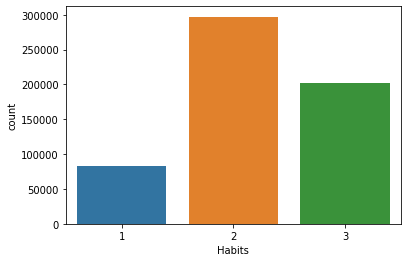

In [34]:
sns.countplot(x = dfHeart_preprocessed['Habits'])

In [35]:
# Group Stroke, Skin Cancer, Asthma and KidneyDisease into a "Prior Diseases" feature

logging.info(f'CREATE PriorDiseases FEATURE')
# Group Smoking, Alcohol Drinking and Physical Activity into a "Bad Habits" feature.
conds_priors = [
    (dfHeart_preprocessed['Stroke'] == True) | (dfHeart_preprocessed['SkinCancer'] == True) | \
    (dfHeart_preprocessed['KidneyDisease'] == True) | (dfHeart_preprocessed['Asthma'] == True), 
]

choices_priors = [
    1
]

dfHeart_preprocessed['PriorDiseases'] = np.select(conds_priors, choices_priors, default = 0)

/tmp/ipykernel_20497/965709856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHeart_preprocessed['PriorDiseases'] = np.select(conds_priors, choices_priors, default = 0)


<AxesSubplot:xlabel='PriorDiseases', ylabel='count'>

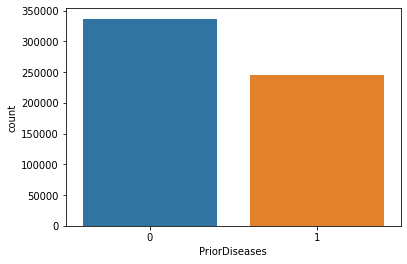

In [36]:
sns.countplot(x = dfHeart_preprocessed['PriorDiseases'])

## Feature Selection / Dimensionality

Lets use permutation Importance 

In [37]:
dfHeart_preprocessed

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,GenHealth,...,age_80orolder_fe,AgeCategory_seq_fe,HeartDisease,FLAG_REAL,Set,BMI_scaled,PhysicalHealth_weeks,MentalHealth_weeks,Habits,PriorDiseases
0,16.600000,True,False,False,3,30,False,1,True,4,...,0,8,False,1,test,-1.942090,1,4,2,1
1,20.340000,False,False,True,0,0,False,1,True,4,...,1,13,False,1,train,-1.343988,0,0,3,1
2,26.580000,True,False,False,20,30,False,0,True,2,...,0,10,False,1,train,-0.346086,3,4,2,1
3,24.210000,False,False,False,0,0,False,1,False,3,...,0,12,False,1,train,-0.725097,0,0,2,1
4,23.710000,False,False,False,28,0,True,1,True,4,...,0,5,False,1,train,-0.805057,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582696,25.984777,True,False,False,0,1,False,1,True,4,...,0,11,True,0,train,-0.441274,0,1,2,0
582697,26.543700,False,False,False,0,0,False,0,True,4,...,0,10,True,0,test,-0.351891,0,0,3,1
582698,26.458366,True,False,True,30,0,True,0,True,2,...,1,13,True,0,train,-0.365538,4,0,2,1
582699,27.956522,True,False,True,15,30,True,0,True,1,...,0,9,True,0,train,-0.125952,2,4,2,1


In [38]:
import eli5
from sklearn.tree import DecisionTreeClassifier
from eli5.sklearn import PermutationImportance

columns = [column for column in dfHeart_preprocessed.columns if column not in  ['HeartDisease', 'Set', 'FLAG_REAL']]


In [39]:
np.random.seed(42)

eli5Model = DecisionTreeClassifier()
eli5Model.fit(dfHeart_preprocessed[columns], dfHeart_preprocessed['HeartDisease'])

logging.info(f'Permutate features, n_iter = 10, cv=5')
eli5Permutation = PermutationImportance(eli5Model, random_state=42).fit(dfHeart_preprocessed[columns], dfHeart_preprocessed['HeartDisease'], n_iter=10, cv=5)

In [40]:
eli5.show_weights(eli5Permutation, feature_names = dfHeart_preprocessed[columns].columns.tolist())

Weight,Feature
0.2346 ± 0.0005,AgeCategory_seq_fe
0.2106 ± 0.0004,BMI_scaled
0.2045 ± 0.0006,GenHealth
0.2029 ± 0.0006,BMI
0.1296 ± 0.0007,Sex
0.1155 ± 0.0002,Smoking
0.1072 ± 0.0002,SleepTime
0.1026 ± 0.0006,PriorDiseases
0.0843 ± 0.0005,diabetic_no_fe
0.0768 ± 0.0005,DiffWalking


BMI Scaled appears slightly more powerful that `BMI`. The `Age category` also has a lot of weight, and the same goes for `General Health`. `Smoking` and `SleepTime` also seem to be important features. Same as the engineered features `PriorDiseases` and `diabetic_no_fe`.  
I don't think the `sex` should be included, even though it shows a high relative weight. The same for `race` features. Because in this case, Race and Gender shouldn't be jittering/biasing the model, because it's related to health. 

## Save Dataset

In [41]:
logging.info(f'Saving Dataset')
dfHeart_preprocessed.to_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_processed.parquet')